<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gradient Descent

## A Blindfolded Hiker

Imagine a person who is blindfolded who is sitting at the bottom of a hill (or anywhere on the hill really). Their goal is to get to the top of the hill. How would they do it?

![Blind Hill Climber](http://www.ryanleeallred.com/wp-content/uploads/2019/01/gradient-ascent.png)

Well, depending on wherever they're currently standing, they would detect the slope of the hill that they're standing on and take a step in an upwards direction. With each step our hiker feels their way forward and re-evaluates the slope of the hill where they are standing before taking anther step. Through this iterative process of analyzing the slope of the hill and taking steps upwards the hiker makes progress up the hill.

Our climber continues this process until they feel like they're on flat ground. If they accidentally overshoot the summit they would feel it due to the slope then pointing downwards and would know to turn around and move back up to the highest (flattest) point.

# Gradient Descent is a Blindfolded Hiker

Gradient Descent is an algorithm that is used for finding the optimal values of a function (maximum or minimum). Although we described our hiker man as if he was trying to find a maximum value, Gradient Descent is typically used to find minimum values of a function. Lets learn a little more about how Gradient Descent uses an iterative mathematic approach (like our hiker) to find a function's minimum.

# "Hypothesis" functions.

In Linear Regression we end up estimating parameters $\beta_0, \beta_1, \ldots , \beta_n$. and once we have estimated these parameters we then take them and plug them into our model. This version of our model with real coefficient values is a Hypothesis Function. However, it is not a requirement of hypothesis functions that they use the estimated parameters they could contain any real values and still be a hypothesis function. Lets look at some examples. We'll go back to our ice cream sales example for some easy data to demonstrate with. 

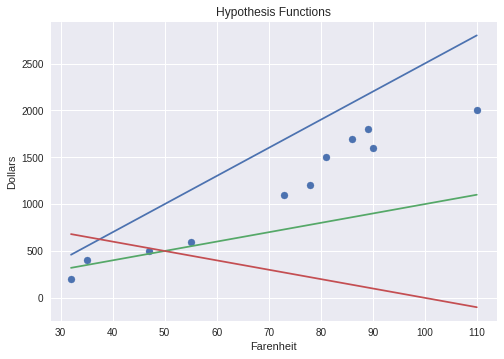

In [25]:
# # Read Data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')

# Creat Scatterplot
plt.scatter(df.Farenheit, df.Dollars)

X = df.Farenheit[:, np.newaxis]
y = df.Dollars

# Create Hypothesis Function Lines
h1 = [30*x - 500 for x in X]
h2 = [10*x + 0 for x in X]
h3 = [-10*x + 1000 for x in X]
plt.plot(X, h1)
plt.plot(X, h2)
plt.plot(X, h3)
# plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Hypothesis Functions")

# Plot Hypothesis Functions
plt.show()

The above are all Hypothesis functions, they don't necessarily fit our data the best, but they are created using the same model, they just have different (arbitrary) parameters for $\beta_0$ and $\beta_1$. We'll represent hypothesis functions generally as $h(x)$.

The above hypotheis functions all follow the form:

\begin{align}
  h(x) = \theta_0 + \theta_1X
\end{align}

Basically we're just hypothesizing that a function that best fits the data well is linear. (a line)

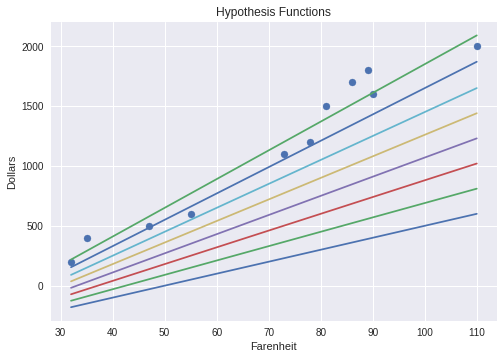

In [26]:
# Creat Scatterplot
plt.scatter(df.Farenheit, df.Dollars)

X = df.Farenheit[:, np.newaxis]
y = df.Dollars

# Create Hypothesis Function Lines
h1 = [10*x - 500 for x in X]
h2 = [12*x - 510 for x in X]
h3 = [14*x - 520 for x in X]
h4 = [16*x - 530 for x in X]
h5 = [18*x - 540 for x in X]
h6 = [20*x - 550 for x in X]
h7 = [22*x - 550 for x in X]
h8 = [24*x - 550 for x in X]

plt.plot(X, h1)
plt.plot(X, h2)
plt.plot(X, h3)
plt.plot(X, h4)
plt.plot(X, h5)
plt.plot(X, h6)
plt.plot(X, h7)
plt.plot(X, h8)

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Hypothesis Functions")

# Plot Hypothesis Functions
plt.show()

# Cost Functions

Functions that gradient descent is trying to minimize are usually referred to as "cost functions" these functions are also referred to by names like: loss function, error function, or scoring function. 

We can measure the quality of our hypotheses using a **cost function**. A cost function compares our hypothesis line to our actual y values and gives it a score based on how well our hypothesis function fits the data. How might we define a cost function to give a score to how well our hypotheses fit the data? Well, you may remember this little beauty:

\begin{align}
SSE = \sum_{i=1}^{n}(y_i - \hat{y})^2
\end{align}

This is the equation for finding the sum of the squared error (or residuals) between our fitted values and our datapoints. To remind you what this looks like here's an old graph that you might be familiar with. 

24.68849397414572
-596.20648399428


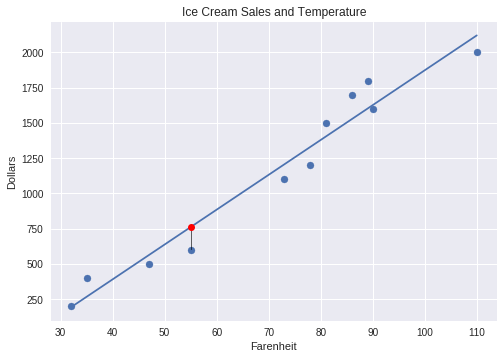

In [27]:
# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print(beta_1)
print(beta_0)

# Make a single prediction for 55 degrees farenheit
x_value = 55

# Calculate predicted value
prediction = beta_1*x_value + beta_0

# Creat Scatterplot
plt.scatter(df.Farenheit, df.Dollars)

# Plot the Regression Line and predicted value
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")

# Plot the error (residual)
plt.arrow(55.2, 600, 0, 150, color='black')
plt.show()

This is a graph showing our Linear Algebra derived optimal coefficients for this problem with the black line representing a "residual" or "error" or in other words, the vertical distance between a predicted point and an actual data point.

What would these errors look like for our hypothesis lines? Would the errors be big or small? This was probably already clear to you but this is simply a way of formalizing how we "minimize the sum of the squared residuals"

We might rewrite our SSE equation in terms of our hypothesis functions instead of our already optimized function like so:

\begin{align}
SSE = \sum_{i=1}^{n}(y_i - h(x_i))^2
\end{align}

The goal is to find the values for $\theta_0$ and $\theta_1$ (contained within $h(x)$) that minimize this cost function. What's good at finding the minimum of things? Gradient Descent!

## What does this cost function look like?



3819286
2176214
1020934
353446
173750
481846
1277734
2561414
4332886


Text(0, 0.5, 'SSE')

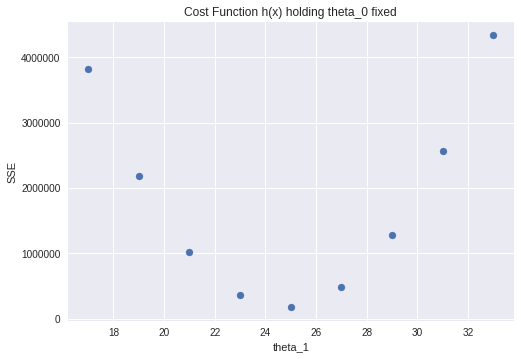

In [28]:
# Define a function that can calculate SSE for any hypothesis function
# print(X)
# print(y)

def SSE(theta_0, theta_1, y, X):
  squared_residuals = []
  for index, value in enumerate(y):
    h_x = theta_0 + theta_1*X[index][0]
    residual = h_x - value
    squared_residual = residual**2
    squared_residuals.append(squared_residual)
  return sum(squared_residuals)
    
SSE_1 = SSE(-600, 17, y, X)
SSE_2 = SSE(-600, 19, y, X)
SSE_3 = SSE(-600, 21, y, X)
SSE_4 = SSE(-600, 23, y, X)
SSE_5 = SSE(-600, 25, y, X)
SSE_6 = SSE(-600, 27, y, X)
SSE_7 = SSE(-600, 29, y, X)
SSE_8 = SSE(-600, 31, y, X)
SSE_9 = SSE(-600, 33, y, X)

print(SSE_1)
print(SSE_2)
print(SSE_3)
print(SSE_4)
print(SSE_5)
print(SSE_6)
print(SSE_7)
print(SSE_8)
print(SSE_9)

plt.scatter([17,19,21,23,25,27,29,31,33], [SSE_1, SSE_2, SSE_3, SSE_4, SSE_5, SSE_6, SSE_7, SSE_8, SSE_9])
plt.title("Cost Function h(x) holding theta_0 fixed")
plt.xlabel('theta_1')
plt.ylabel('SSE')

What shape does our cost function have when we only vary the slope variable and hold the other constant? It has the shape of a parabola. 

If we varied both values we would then have a mapping of a higher dimension so what do you think our cost function would look like if we varied both $\theta_0$ and $\theta_1$?

Well, it turns out that it would look something like this:

![Cost Function](https://1569708099.rsc.cdn77.org/wp-content/uploads/2017/09/Quadratic-Cost-Function-379x284.png?x31195)

Where the x axis is $\theta_0$ the z axis is $\theta_1$ and the y axis is our $SSE(\theta_0, \theta_1)$

# Blindfolded Hiker on our Linear Regression Cost Function

What if we put our blindfolded hiker onto our new cost functions and told him to get to the bottom? What might his travels look like? Maybe they would look something like this:

![X^2 Gradient Descent](https://jed-ai.github.io//images/python/py1/fig2.gif)

If we took our 3D plot and turned it into a contour plot his travels might look something like this:

![3D Gradient Descent](https://jed-ai.github.io//images/python/py1/fig4.gif)

# Using Gradient Descent to Minimize Cost Functions

We'll first talk about using Gradient Descent to minimize an arbitrary cost function and then later we'll implement it specifically on our linear regression example. 

First lets talk about the equation for gradient descent:

![Gradient Descent Equation](https://cdn-images-1.medium.com/max/800/0*8yzvd7QZLn5T1XWg.jpg)

- $J$ represents our cost function.
- The derivative term in front of $J$ (the fraction part) is our "gradient" in n-dimensional space or our "slope" in 2D space.
- $\alpha$ is our "Learning Rate" (how big of steps that we we initially take)
- $\theta_j$ represents our current position. So all of the RHS (right hand side) of this equation is calculated all at once and is then used to replace our current position with the new updated position.

1) Start off with initial guesses for $\theta_0$ and $\theta_1$. (We'll just start them both out at 0)

2) Change $\theta_0$ and $theta_1$ a little bit (according to the above equation) and reevaluate our cost function.

But first, lets demonstrate this process on a simple $X^2$ graph. This kind of a graph could come from a cost function that only has one parameter (we demonstrated this above when we held our intercept value fixed and only changed the slope value)

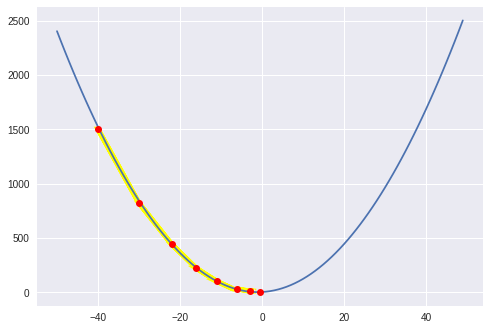

In [29]:
# Plot y=x^2 function
import matplotlib.pyplot as plt

a=[]
b=[]

for x in range(-50,50,1):
    y=x**2+2*x+2
    a.append(x)
    b.append(y) 

fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(a,b)

# Plot Gradient Descent Equation Demonstration
plt.plot(-40, 1500, 'ro')
plt.arrow(-40, 1500, 10, -680, linewidth=5, color='yellow')
plt.plot(-30, 820, 'ro')
plt.arrow(-30, 820, 8, -380, linewidth=5, color='yellow')
plt.plot(-22, 440, 'ro')
plt.arrow(-22, 440, 6, -220, linewidth=5, color='yellow')
plt.plot(-16, 220, 'ro')
plt.arrow(-16, 220, 5, -120, linewidth=5, color='yellow')
plt.plot(-11, 100, 'ro')
plt.arrow(-11, 100, 4, -70, linewidth=5, color='yellow')
plt.plot(-6, 30, 'ro')
plt.arrow(-6, 30, 3, -20, linewidth=5, color='yellow')
plt.plot(-3, 10, 'ro')
plt.arrow(-3, 10, 1, 0, linewidth=5, color='yellow')
plt.plot(-.5, 0, 'ro')


plt.show()

We'll move a copy of our function down here for convenience
![Gradient Descent formula](http://www.ryanleeallred.com/wp-content/uploads/2019/01/gradient-descent-formula.png)

Notice that because our step size (alpha) is multiplied by our gradient (slope) that even though we initialize our step size with a constant value it become altered by the value of the gradient so that we take smaller and smaller steps as the graph gets flatter. (closer to a minimum hopefully).

# Optimizing The Learning Rate

This is part of a process that we call hyperparameter tuning. Hyperparameter tuning in its most crude form basically means try out different features of your parameters (like learning rate) and see what happens to your results. Keep on iterating until you converge on an optimal learning rate. (Maybe we can implement gradient descent to find the most optimal learning rate for our gradient descent. 🤔)

You can read up on different techniques for choosing an appropriate learning rate. We will explore more sophisticated Hyperparameter Tuning techniques later on in the class.

You'll usually be fine with a pretty small learning rate (.01 or .02) when you're solving linear regression using Gradient Descent (as long as you use a sufficient number of iterations)

![Learning Rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

# Gradient Descent Implementation for Bivariate Linear Regression

## Standardize X matrix & look at OLS coefficients for comparison

In [30]:
## Lets implement it and see how close GD comes to sklearn!

# Lets Implement it!!!

# First we'll calculate our parameters using sklearn to see how close our 
# Gradient Descent Method gets. 

# Read Data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')

# Create X matrix and y vector
X = df['Farenheit'].values[:, np.newaxis]

# If we don't do this our GD stuff will break
X = (X - X.mean()) / X.std()

# Matrix version makes cool linalg tricks possible
X_linalg = np.c_[np.ones(X.shape[0]), X] 

# print(X_linalg)

# Boring y variable list
y = df['Dollars'].values

# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print("beta_1: ", beta_1)
print("beta_0: ", beta_0)

beta_1:  587.5808413073931
beta_0:  1145.4545454545455


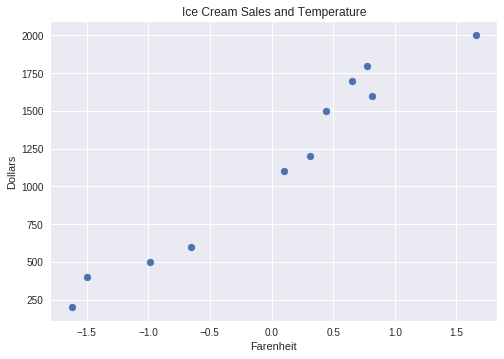

In [31]:
plt.scatter(X,y)

# Add axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show()

## Set initial hyperparameters

In [0]:
# Initial Variables
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(42)
theta = [0, 0]

## Calculate Predictions

In [33]:
prediction = np.dot(X_linalg, theta)
# print(X_linalg)
print(prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Calculate Error

In [34]:
print('y: \n', y)
error = prediction - y
print('\n error \n:',error)

y: 
 [ 200  400  500  600 1100 1200 1500 1700 1800 1600 2000]

 error 
: [ -200.  -400.  -500.  -600. -1100. -1200. -1500. -1700. -1800. -1600.
 -2000.]


## Update Theta List Values

In [35]:
theta = theta - (alpha * (1/n) * np.dot(X.T, error))
# print((alpha * (1/n) * np.dot(X.T, error)))
print(theta)

[5.87580841 5.87580841]


## Minimal Gradient-Descent Implementation

In [36]:
# Put it all together
def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X, theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T, error))
#     print(updates)
    theta = theta - updates
  return theta
  
gradient_descent(X_linalg, y, theta, iterations, alpha)

array([1145.45454333,  587.58084022])

## Implementation with saved cost and theta values for graphing costs and animations

In [37]:
# We need to save all of our thetas so that we can make our animation

# Put it all together
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*n) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/n) * np.dot(x.T, error))
        past_thetas.append(theta)
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(X_linalg, y, theta, iterations, alpha)

final_theta = past_thetas[-1]

print("Gradient Descent Results: {:.5f}, {:.5f}".format(final_theta[0], final_theta[1]))

Gradient Descent Results: 1145.45454, 587.58084


## Cost by iterations

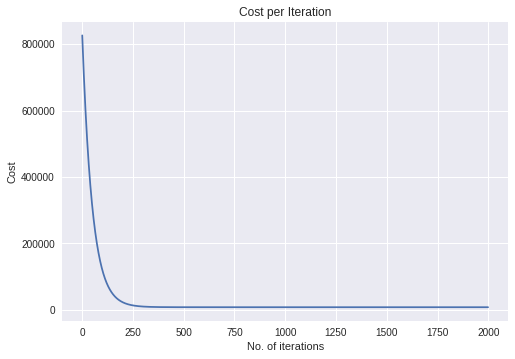

In [38]:
# Show cost decreasing with additional iterations
plt.title('Cost per Iteration')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

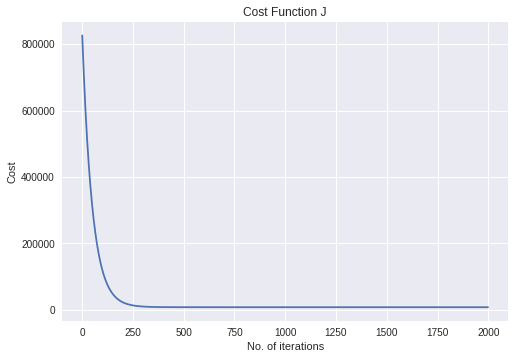

In [39]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

## Animation Code

In [40]:
import matplotlib.animation as animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Ice Cream Sales vs Temperature')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Revenue ($)')
plt.scatter(X_linalg[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*X_linalg + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable. Trying to use pillow instead.


IndexError: ignored

## Display Animation

This code probably won't work well unless you run it in a local ipython notebook. And maybe not then either. 😉

In [0]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## Gradient Descent *is* Machine Learning

What does Gradient Descent do? It finds model parameters that minimize a cost function. (That get the best results!) This cuts to the very heart of what machine learning is: Solving uniquely specified optimization problems. I hope you can see how this iterative process of seeing an optimum is not just good for machines, but can be an elegant way of describing learning in general. For both humans and computers!

## Improvements to Gradient Descent

There are **many** Gradient-Descent based optimizers out there that seek improve upon the "vanilla" gradient descent that we have implemented here.

What if we had a cost function that wasn't convex? What if our cost function had multiple local minima?

![Global Minimum](http://www.ryanleeallred.com/wp-content/uploads/2019/01/Global-Minimum.png)

But what if we had initialized our theta values just slightly differently. Where would the gradient have taken us? 

![Local Minimum](http://www.ryanleeallred.com/wp-content/uploads/2019/01/Local-Minima.png)

Hopefully these two images help you see how with more complex cost functions it can be difficult to find the global minimum and even slightly different initial values can lead to completely different results. The question about how to overcome these challenges has lead to a plethora of gradient-descent based optimizers all seeking to overcome these challenges.

If you feel like you have a good grasp of what I'm calling "vanilla" gradient descent then start delving into understanding these different optimizers:

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)